# Preprocessing of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import sklearn

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the data for the NJ train network. Month of March 2018. Drop the observations with NaN delay.

In [0]:
df = pd.read_csv('/content/2018_03.csv')
df.dropna(subset=['delay_minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

Encoding the days of the week (0 : Monday ..., 6 : Sunday) 

In [0]:
day = []
time = []

for (k,v) in enumerate(df['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    time_only = aux.time()
    day.append(aux.weekday())
    time_in_min = time_only.hour*60 + time_only.minute
    time.append(time_in_min)
    
df['day'] = day
df['time'] = time

In [4]:
df.head(n=5)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type,day,time
0,2018-03-01,3805,1.0,New York Penn Station,105,New York Penn Station,105,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit,4,81
1,2018-03-01,3805,2.0,New York Penn Station,105,Secaucus Upper Lvl,38187,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit,4,91
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187,Newark Penn Station,107,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit,4,100
3,2018-03-01,3805,4.0,Newark Penn Station,107,Newark Airport,37953,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit,4,105
4,2018-03-01,3805,5.0,Newark Airport,37953,North Elizabeth,109,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit,4,109


Encoding the line names and the departure station with label encoding

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['line'] = le.fit_transform(df['line'])
df['from_id'] = le.fit_transform(df['from_id'])
df['train_id'] = le.fit_transform(df['train_id'])

In [6]:
df.head()

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type,day,time
0,2018-03-01,562,1.0,New York Penn Station,97,New York Penn Station,105,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,7,NJ Transit,4,81
1,2018-03-01,562,2.0,New York Penn Station,97,Secaucus Upper Lvl,38187,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,7,NJ Transit,4,91
2,2018-03-01,562,3.0,Secaucus Upper Lvl,159,Newark Penn Station,107,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,7,NJ Transit,4,100
3,2018-03-01,562,4.0,Newark Penn Station,99,Newark Airport,37953,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,7,NJ Transit,4,105
4,2018-03-01,562,5.0,Newark Airport,155,North Elizabeth,109,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,7,NJ Transit,4,109


In [0]:
df.drop(columns = ['date','from','to','to_id','scheduled_time','status','type','actual_time'], inplace = True)

In [0]:
df.head(n=5)
df['delay_seconds'] = df['delay_minutes']*60
df.drop(columns=['delay_minutes'],inplace=True)
#len(df)


In [9]:
df.sort_values(by=['train_id','day'])
df.head(50)
len(df[df['line']==7])

37663

In [10]:
df.head(50)

,train_id,stop_sequence,from_id,line,day,time,delay_seconds
0,562,1.0,97,7,4,81,0.0
1,562,2.0,97,7,4,91,8.0
2,562,3.0,159,7,4,100,7.0
3,562,4.0,99,7,4,105,10.0
4,562,5.0,155,7,4,109,10.0
5,562,6.0,101,7,4,112,1.0
6,562,7.0,38,7,4,118,5.0
7,562,8.0,64,7,4,121,0.0
8,562,9.0,119,7,4,128,0.0
9,562,10.0,75,7,4,133,10.0


In [11]:
df_line_7 = df[df['line']==7]
df_line_7.head()

,train_id,stop_sequence,from_id,line,day,time,delay_seconds
0,562,1.0,97,7,4,81,0.0
1,562,2.0,97,7,4,91,8.0
2,562,3.0,159,7,4,100,7.0
3,562,4.0,99,7,4,105,10.0
4,562,5.0,155,7,4,109,10.0


In [12]:
# LSTM with window regression framing

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :] #adding time
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset, I chose to work on line 7 only as an example
df_line_7 = df[df['line']==7]
dataset = df_line_7[['delay_seconds','time']] #adding time
#dataset_test = dataset[dataset['stop_sequence'] == 10]
#dataset_train = dataset[dataset['stop_sequence'] !== 10]
dataset = dataset.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)#.reshape(-1,1))

In [14]:
dataset[0:20]

array([[0.0000000e+00, 5.6289092e-02],
       [1.4638610e-03, 6.3238360e-02],
       [1.2808783e-03, 6.9492705e-02],
       [1.8298263e-03, 7.2967343e-02],
       [1.8298263e-03, 7.5747050e-02],
       [1.8298262e-04, 7.7831835e-02],
       [9.1491314e-04, 8.2001396e-02],
       [0.0000000e+00, 8.4086172e-02],
       [0.0000000e+00, 8.8950664e-02],
       [1.8298263e-03, 9.2425302e-02],
       [1.6468436e-03, 9.5899932e-02],
       [1.6468436e-03, 9.9374570e-02],
       [1.4638610e-03, 1.0284921e-01],
       [0.0000000e+00, 1.0632384e-01],
       [0.0000000e+00, 1.1049340e-01],
       [0.0000000e+00, 1.1257818e-01],
       [0.0000000e+00, 4.1070190e-01],
       [5.6541629e-02, 4.1904101e-01],
       [5.5809699e-02, 4.2390552e-01],
       [5.5626716e-02, 4.3363449e-01]], dtype=float32)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size

#if we want to test on a single time, filter the test set to have only times = ...
#if we want to test on a single station, we have to filter earlier, when dataset is still a df

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+look_back-1
look_back = 4 #for example
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input dimensions to be [delay, time, features] with the features being the following delays
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

In [16]:
trainX.shape

(30125, 4, 2)

In [17]:
#for example, at stop number 13, the delay 4 stops later is 0,05654 (verification made two cells above)
print(trainX[13]) 
print(trainY[13])

[[0.         0.10632384]
 [0.         0.1104934 ]
 [0.         0.11257818]
 [0.         0.4107019 ]]
0.05654163


In [18]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(look_back, 2)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
model.summary()





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 - 116s - loss: 0.0030
Epoch 2/10
 - 113s - loss: 0.0027
Epoch 3/10
 - 113s - loss: 0.0026
Epoch 4/10
 - 113s - loss: 0.0026
Epoch 5/10
 - 114s - loss: 0.0026
Epoch 6/10
 - 115s - loss: 0.0026
Epoch 7/10
 - 116s - loss: 0.0026
Epoch 8/10
 - 114s - loss: 0.0026
Epoch 9/10
 - 115s - loss: 0.0026
Epoch 10/10
 - 114s - loss: 0.0026
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [28]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

testPredict.shape

(7528, 1)

In [0]:
# invert predictions to have the real values of the delays, marche pas pour l'instant
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict[:,0].reshape(-1,1))
#testY = scaler.inverse_transform([testY])

In [0]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

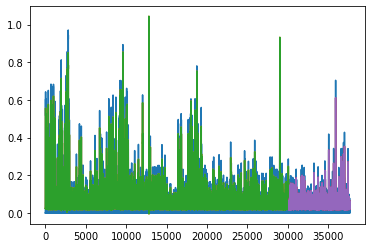

In [46]:
# plot baseline and predictions
plt.plot(dataset[:,0])#groundtruth #scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()